# COMP47670 | Assignment 1 | 19342403 | Task 2 | Data Preparation and Analysis

## API Name: WHO Global Health Observatory 

The data collected in Task 1 will be used to perform the data analysis in this Task.

The following libraries are imported to be used to prepare and analyse the data. 

In [2032]:
import json, requests
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

Directories for storing indicator data and background information:

In [2033]:
indicator_dir = Path('assignment_1_indicator_data')
indicator_dir.mkdir(parents=True, exist_ok = True)

info_dir = Path('assignment_1_information_data')
info_dir.mkdir(parents=True, exist_ok=True)

## Data Preprocessing

The get_indicator_name helper function retrieves the indicator name from the indicator information file so that the indicator name can be added to the dataframe. 

In [2034]:
def get_indicator_name(indicator_data):
    
    # Assign the indicator code and indicator information file
    indicator_code = indicator_data[0]['IndicatorCode']
    indicator_file = info_dir / 'Indicator Information.json'
    
    # Open the JSON file with the indicator information and load into a python object
    try:
        with open(indicator_file) as indicator_info:
            indicator_list = json.load(indicator_info)
    except FileNotFoundError:
            print(f"File {indicator_file} not found")
    
    # Enumerate through the indicator information data
    for idx, value in enumerate(indicator_list):
        
        # If the indicator code is found, assign the indicator name
        if indicator_list[idx]['IndicatorCode'] == indicator_code:
            indicator_name = indicator_list[idx]['IndicatorName']
            return(indicator_name)
            

A helper function similar to the get_indicator_name function is defined to get the country name so that this name can be added to the dataframe:

In [2035]:
#Get the country name given one item in the indicator_data
def get_country_name(item_in_indicator_file): 
    #Have to make sure that getting country data and not the region name. 
    if item_in_indicator_file['SpatialDim'].isalpha() and item_in_indicator_file['SpatialDimType'] == 'COUNTRY' :
        country_code = item_in_indicator_file['SpatialDim']
    else:
        return
    country_file = info_dir / 'Country Information.json'
    
    #Open the JSON file with the country information and load into a python object
    try:
        with open(country_file) as country_info:
            country_list = json.load(country_info)
    except FileNotFoundError:
        print(f"File {country_file} not found")
        
    #Enumerate through the country information data
    for idx, value in enumerate(country_list):
        
        #If country code is found, assign the country name
        if country_list[idx]['Code'] == country_code:
            country_name = country_list[idx]['Title']
            return(country_name)

## Data Parsing and Merging

The data needs to be transformed into a usable format. 

The parse_raw_data function will parse an individual JSON data file that was collected during Task 1. This function will open the raw JSON file and store the data in a dataframe specific to that indicator. 

Only the relevant parameters for each indicator are added to the dataframe for that indicator. These parameters are country code, country, region, year and the indicator itself. As a result of the parse_raw_data function, each indicator is now stored in its own dataframe. 

In [2036]:
# Create function that opens the json files and loads the relevant indicator data into the dataframe.
def parse_raw_data(fpath):
    # Open the json files and load the data into a python object
    # Exception handling for file not found error. 
    try:
        with open(fpath) as data_file:
            print(f'Parsing {fpath}')
            indicator_data = json.load(data_file)
    except FileNotFoundError:
        print(f"{fpath.name} file not found")
        return
    
    # Get the indicator name
    indicator_name = get_indicator_name(indicator_data)
    
    # Create list of dictionaries with all the inputs for the indicator in question.
    rows = []
    
    # Enumerate through the indicator data
    for idx, value in enumerate(indicator_data):
        row = {'Country Code': value['SpatialDim']}
        # Add the country name to the dataframe
        row['Country'] = get_country_name(value)
        # Add the region
        row['Region'] = value['ParentLocation']
        # Add the year
        row['Year'] = value['TimeDim']
        # Add the indicator name to the dataframe
        row[indicator_name] = value['NumericValue']
        rows.append(row)
    # Return the dataframe for that indicator
    return pd.DataFrame(rows)
    
    


The parse_merge_raw function will merge the inidividual indicator dataframes into one singular dataframe, making the data easy to access for further analysis and manipulation.

In [2037]:
# Merge all the dataframes into one single dataframe
def parse_merge_raw_data(file_paths):
    
    # Create a list to store the individual indicator dataframes 
    df_files = []
    for fpath in file_paths:
        if fpath.suffix == '.json':
            # Parse each of the raw indiciator files
            df_file = parse_raw_data(fpath)
            print(f"Creating dataframe for data in {fpath}")
            
            # Append each indicator dataframe to the list to store all the individual indicator dataframes
            df_files.append(df_file)
    print(f'Merging dataframes')
    
    # Merge all the individual indicator dataframes into one singular dataframe
    df_total = pd.concat(df_files, ignore_index = True)
    return(df_total)
    


The parse_merge_raw_data function is called to create a single dataframe which includes the data from all the indicators. 

In [2038]:
# Parse and merge the indicator data into one dataframe
df = parse_merge_raw_data(indicator_dir.iterdir())
df

Parsing assignment_1_indicator_data\Alcohol Consumption.json
Creating dataframe for data in assignment_1_indicator_data\Alcohol Consumption.json
Parsing assignment_1_indicator_data\Cholesterol.json
Creating dataframe for data in assignment_1_indicator_data\Cholesterol.json
Parsing assignment_1_indicator_data\Health Expenditure.json
Creating dataframe for data in assignment_1_indicator_data\Health Expenditure.json
Parsing assignment_1_indicator_data\Hypertension.json
Creating dataframe for data in assignment_1_indicator_data\Hypertension.json
Parsing assignment_1_indicator_data\Life Expectancy.json
Creating dataframe for data in assignment_1_indicator_data\Life Expectancy.json
Parsing assignment_1_indicator_data\Non-communicable Disease Mortality Rate.json
Creating dataframe for data in assignment_1_indicator_data\Non-communicable Disease Mortality Rate.json
Parsing assignment_1_indicator_data\Obesity.json
Creating dataframe for data in assignment_1_indicator_data\Obesity.json
Parsing a

,Country Code,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
0,LBR,Liberia,Africa,2019,3.64307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMR,None,None,2015,7.67873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AZE,Azerbaijan,Europe,2005,1.80680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RWA,Rwanda,Africa,2015,1.37332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COK,Cook Islands,Western Pacific,2015,10.48172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33070,ARE,United Arab Emirates,Eastern Mediterranean,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2
33071,UZB,Uzbekistan,Europe,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6
33072,GRC,Greece,Europe,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.2
33073,MDG,Madagascar,Africa,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0


In [2039]:
# Check the number of rows and columns in the dataframe
df.shape

(33075, 12)

The above dataframe df is formed from all of the individual dataframes merged together. This dataframe has 33,075 rows and 12 columns. This dataframe will be filtered and cleaned before it can be used for analysis.

## Data Preparation

The merged dataframe is to be prepared for data analysis. This preparation includes filtering and cleaning the data in the dataframe.

The data is cleaned to remove any numeric values from the Country Code column. Any rows that contain a numeric country code are removed. 

The data is then aggregated so that each year within a country is grouped together. For example, all of the data for Ireland in 2019 is contained on the one row. Only data for the period between 2000 and 2023 is to be considered in this assignment, so the dataframe is filtered accordingly.

In [2040]:
# Remove rows with numbers for country code
df = df[~df['Country Code'].str.isnumeric()]

#Sort dataframe
df = df.sort_values(by='Country', ascending=True)

# Group each year within a country together
# Aggregate the sum of all the rows in a column for a specific year.
aggregations = {
    'Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)': 'sum',
    'Mean Non-HDL cholesterol, age-standardized': 'sum',
    'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)': 'sum',
    'Prevalence of hypertension among adults aged 30-79 years, age-standardized': 'sum',
    'Life expectancy at birth (years)': 'sum',
    'Age-standardized NCD mortality rate  (per 100 000 population)': 'sum',
    'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)': 'sum',
    'Estimate of current tobacco use prevalence (%) (age-standardized rate)': 'sum',
}

# Group by Country Code, Country, Region and Year and then apply the aggregation
df = df.groupby(['Country Code', 'Country', 'Region', 'Year'], as_index=False).agg(aggregations)

# For the purposes of this study, only data from 2000 to 2023 will be included. In the data there are some estimates until 2030, but these values wont be considered
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2024)]

# Reset the index of the dataframe and change the index to CountryCode
df.reset_index(drop=True, inplace=True)
df.set_index('Country Code', inplace=True)

In [2041]:
# View the dataframe
df

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,,,
AFG,Afghanistan,Eastern Mediterranean,2000,0.00277,3.1,0.00,36.4,54.98949,1041.634,4.25171,39.2
AFG,Afghanistan,Eastern Mediterranean,2001,0.00000,3.1,0.00,36.5,0.00000,1050.808,4.59872,0.0
AFG,Afghanistan,Eastern Mediterranean,2002,0.00000,3.1,0.08,36.7,0.00000,1051.905,4.97112,0.0
AFG,Afghanistan,Eastern Mediterranean,2003,0.00000,3.1,0.65,36.9,0.00000,1042.000,5.36920,0.0
AFG,Afghanistan,Eastern Mediterranean,2004,0.00000,3.1,0.54,37.1,0.00000,1038.197,5.79330,0.0
...,...,...,...,...,...,...,...,...,...,...,...
ZWE,Zimbabwe,Africa,2018,0.00000,2.8,1.59,42.4,0.00000,738.462,12.33166,0.0
ZWE,Zimbabwe,Africa,2019,3.62809,0.0,0.46,42.3,60.68252,734.978,12.76917,0.0
ZWE,Zimbabwe,Africa,2020,0.00000,0.0,0.65,0.0,0.00000,0.000,13.22733,11.9


In [2042]:
# Check the number of rows and columns in the dataframe
df.shape

(4621, 11)

The number of rows in the dataframe has been reduced from 33,075 to 4,621 due to this data preparation.

### Data Verification (Summarise the data)

Check the format of the dataframe for a specific coutry to see that it includes all relevant parameters and is in the correct format:

In [2043]:
#Check the data for a specific country
ireland_data = df[df['Country'] == 'Ireland']
ireland_data

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,,,
IRL,Ireland,Europe,2000,15.03272,3.8,4.57,36.7,76.41336,514.3089,19.21634,35.7
IRL,Ireland,Europe,2001,0.00000,3.8,5.01,36.5,0.00000,486.1219,19.85199,0.0
IRL,Ireland,Europe,2002,0.00000,3.7,5.27,36.4,0.00000,468.9396,20.46919,0.0
IRL,Ireland,Europe,2003,0.00000,3.7,5.52,36.3,0.00000,449.4974,21.06296,0.0
IRL,Ireland,Europe,2004,0.00000,3.7,5.70,36.1,0.00000,435.2672,21.63142,0.0
IRL,Ireland,Europe,2005,14.14072,3.6,6.03,36.0,0.00000,413.1000,22.17329,30.9
IRL,Ireland,Europe,2006,0.00000,3.6,5.85,35.8,0.00000,409.7148,22.68436,0.0
IRL,Ireland,Europe,2007,0.00000,3.6,6.19,35.6,0.00000,405.5802,23.16254,29.2
IRL,Ireland,Europe,2008,0.00000,3.6,7.24,35.4,0.00000,395.1996,23.60825,0.0


There are many cells with the value 0. These cells are data that was not available from the API. For example, Ireland is missing data for life expectancy for most years between 2000 and 2022. This is data that has simply not been recorded. 

These 0 value cells will be dealt with in the different sections of the data analysis.

Before proceeding with the data analysis, a summary of the dataframe is given:

In [2044]:
def summarise_dataframe(df):
    summary = {}

    # Range of Data: earliest and latest Year
    summary['time_range'] = (df['Year'].min(), df['Year'].max())

    # Geographical Coverage: List of Regions and number of countries per region
    summary['regions'] = df['Region'].unique().tolist()
    summary['countries_per_region'] = df.groupby('Region')['Country'].nunique().to_dict()

    return summary

In [2045]:
#Call the summarise_dataframe function and show the results
df_summary = summarise_dataframe(df)
for key, value in df_summary.items():
    print(f"{key}: {value}\n")

time_range: (2000, 2022)

regions: ['Eastern Mediterranean', 'Africa', 'Europe', 'Americas', 'Western Pacific', 'South-East Asia']

countries_per_region: {'Africa': 47, 'Americas': 37, 'Eastern Mediterranean': 22, 'Europe': 54, 'South-East Asia': 11, 'Western Pacific': 30}



The data is now ready to be used in the data analysis. 

## Data Analysis

### Health Expenditure

Now that the data is in a usable format, it can be manipulated to show trends and relationships between the different health-related indicators. An important indicator is the domestic general government health expenditure as a percentage of GDP. This provides an indication of the priority that a government places on health expenditure. 

The first step is to remove any rows that contain a 0 value cell in the 'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)' column. 

In [2046]:
# Remove rows with 0 for health expenditure column
df_health = df[df['Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)'] > 0]

# View health expenditure DataFrame
df_health

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,,,
AFG,Afghanistan,Eastern Mediterranean,2002,0.00000,3.1,0.08,36.7,0.00000,1051.9050,4.97112,0.0
AFG,Afghanistan,Eastern Mediterranean,2003,0.00000,3.1,0.65,36.9,0.00000,1042.0000,5.36920,0.0
AFG,Afghanistan,Eastern Mediterranean,2004,0.00000,3.1,0.54,37.1,0.00000,1038.1970,5.79330,0.0
AFG,Afghanistan,Eastern Mediterranean,2005,0.02684,3.1,0.53,37.2,0.00000,1027.3780,6.24419,34.2
AFG,Afghanistan,Eastern Mediterranean,2006,0.00000,3.1,0.50,37.4,0.00000,1015.4060,6.72338,0.0
...,...,...,...,...,...,...,...,...,...,...,...
ZWE,Zimbabwe,Africa,2017,0.00000,2.8,1.60,42.6,0.00000,755.6024,11.91003,0.0
ZWE,Zimbabwe,Africa,2018,0.00000,2.8,1.59,42.4,0.00000,738.4620,12.33166,0.0
ZWE,Zimbabwe,Africa,2019,3.62809,0.0,0.46,42.3,60.68252,734.9780,12.76917,0.0


To analyse the health expenditure for each region, the plot_trend function is defined to plot the trend in the data. To plot the regional trend, the function is called so that the data is grouped by Region and Year. 

This function first groups the data by region and year and finds the mean indicator value for each region in that year. It then pivots the dataframe so that it can be plotted in the correct format, and finally plots the graph.

The health expenditure data for each region for the period between 2000 and 2021 is plotted below. 2021 is the latest year that data for domestic general government health expenditure as a percentage of GDP is available. 

In [2047]:
def plot_trend(groupby_list, dataframe, indicator, title='', xlabel='', ylabel=''):
    # Group the data by region and year, and calculate the mean indicator value for each region for each year
    df_trend = dataframe.groupby(groupby_list)[indicator].mean().reset_index()
    
    if len(groupby_list) > 1:
        # Pivot the DataFrame so that each region becomes a separate column, years are the index, and values are the health expenditures
        df_trend_pivoted = df_trend.pivot(index= 'Year', columns='Region', values=indicator)
        # Plotting the trends
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=df_trend_pivoted)
        plt.legend(title='Region', loc='upper left')
    else:
        plt.figure(figsize=(14, 7))
        sns.lineplot(x=df_trend['Year'], y=df_trend[indicator], marker='o')
    
    # Adding titles and lables
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #To plot every year on the x axis
    plt.xticks(df_trend['Year'].unique())
    plt.grid(True)
    
    # Display the plot
    plt.show()
    

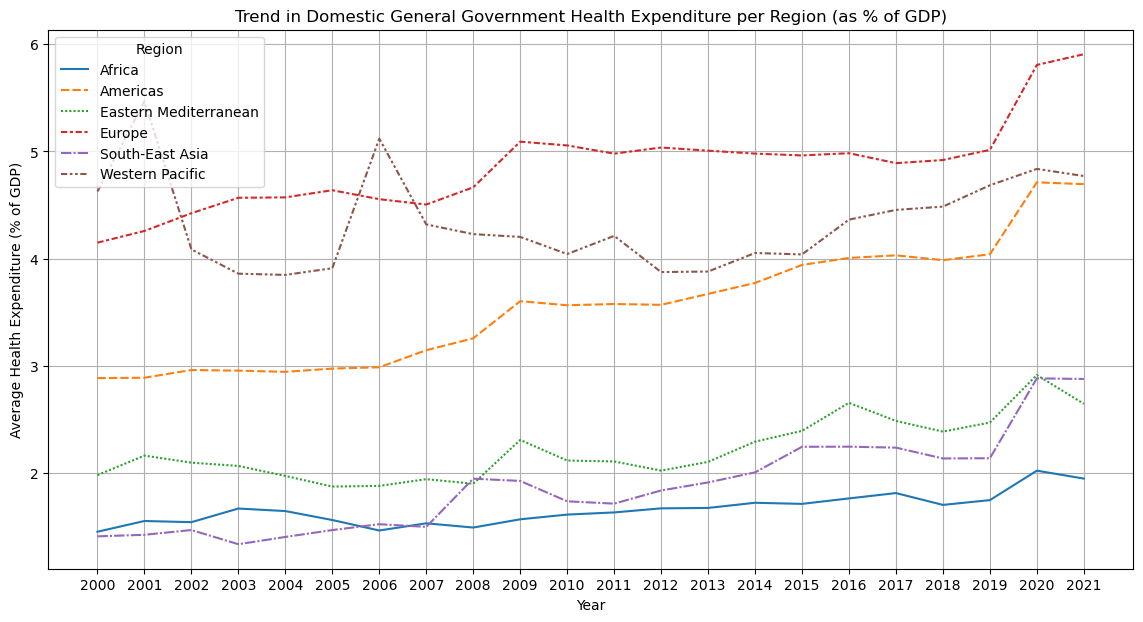

In [2048]:
# Group by Region then by Year
groupby_list = ['Region', 'Year']

#Plot the trend
plot_trend(groupby_list, df_health, 'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)', 'Trend in Domestic General Government Health Expenditure per Region (as % of GDP)', 'Year', 'Average Health Expenditure (% of GDP)')

This graph clearly shows the trends of domestic general government health expenditure per region over a 21 year period. The trends in this graph provide an indication of the importance of resources channelled to health by governments in each region. From the graph, the region that seems to place the most importance on health expenditure is Europe, while Africa places the least importance on health expenditure. The steady rise in health expenditure in regions such as Europe and the Americas may be in response to an ageing population.

There is a clear spike across all regions in 2020. This will be further investigated by showing the global trend in government health expenditure. 

To analyse the global trend in health expenditure, the mean health expenditure for all countries for every year is found. These mean values are then plotted. 

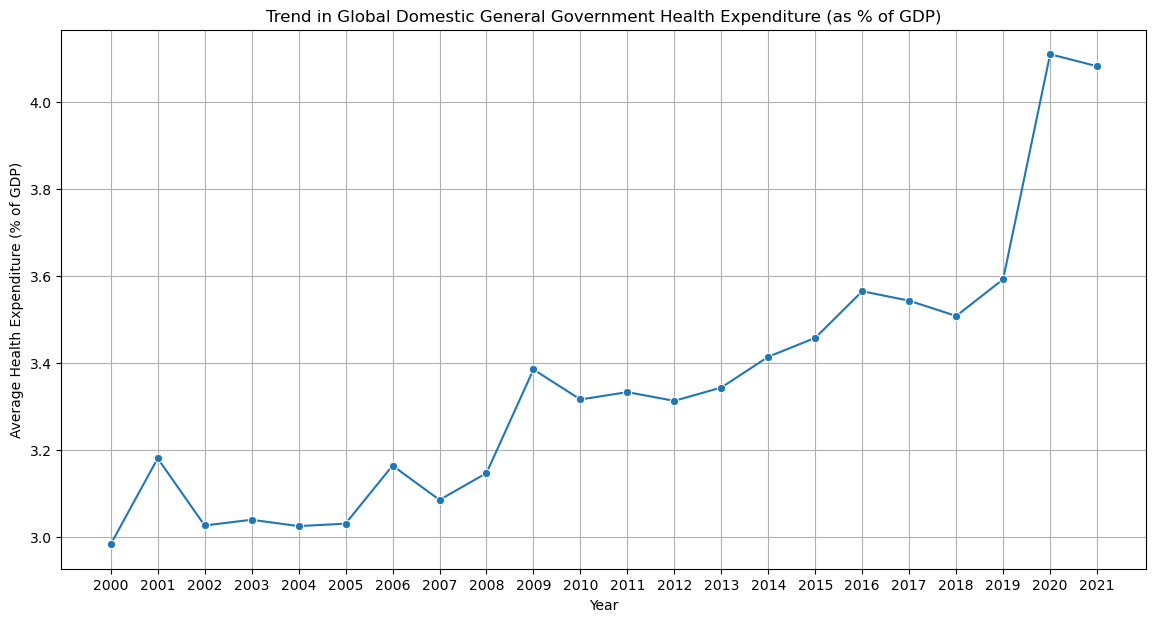

In [2049]:
# Group the data by Year
groupby_list = ['Year']

#Plot the global trend in health expenditure
plot_trend(groupby_list, df_health, 'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)', 'Trend in Global Domestic General Government Health Expenditure (as % of GDP)', 'Year', 'Average Health Expenditure (% of GDP)')


There is a clear spike in health expenditure in 2020. This could be attributed to the COVID-19 pandemic. Many countries significantly increased their health budgets to cope with the crisis, leading to this rise in health expenditures. 

### Life Expectancy

Life expectancy is another useful health-related indicator to analyse. Life expectancy at birth reflects the overall mortality level of a population. It summarizes the mortality pattern that prevails across all age groups - children and adolescents, adults and the elderly.

In [2050]:
#Remove 0 value cells in life expectancy column
df_life = df[df['Life expectancy at birth (years)'] > 0]

#View life expectancy DataFrame
df_life

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,,,
AFG,Afghanistan,Eastern Mediterranean,2000,0.00277,3.1,0.00,36.4,54.98949,1041.6340,4.25171,39.2
AFG,Afghanistan,Eastern Mediterranean,2010,0.01241,3.1,0.47,38.2,59.94055,950.6849,8.95014,30.2
AFG,Afghanistan,Eastern Mediterranean,2015,0.00874,3.1,0.52,39.2,61.65429,895.0696,12.56313,26.6
AFG,Afghanistan,Eastern Mediterranean,2019,0.01618,0.0,0.50,40.2,63.20990,881.2331,16.21054,0.0
AGO,Angola,Africa,2000,5.18632,2.8,1.11,37.9,49.30265,775.0211,5.30158,0.0
...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Africa,2019,3.85176,0.0,2.26,32.3,62.45290,679.4242,9.55727,0.0
ZWE,Zimbabwe,Africa,2000,3.02610,2.8,0.00,40.4,46.57054,608.2065,6.84812,21.4
ZWE,Zimbabwe,Africa,2010,3.31307,2.9,2.75,43.4,51.49335,861.7858,9.42298,15.7


The data is then grouped by Region and the mean life expectancy for each region from the period between 2000 and 2019 is calculated. For most countries, data for life expectancy is only available for the years 2000, 2010, 2015 and 2019. 

In [2051]:
#Group the data by Region and calculate the mean life expectancy for each region
df_mean_life = df_life.groupby('Region')['Life expectancy at birth (years)'].mean()

#Convert the series to a dataframe
df_mean_life = df_mean_life.reset_index()

#View the mean life dataframe
df_mean_life

,Region,Life expectancy at birth (years)
0,Africa,60.346396
1,Americas,73.992406
2,Eastern Mediterranean,70.559380
3,Europe,76.376062
4,South-East Asia,70.553425
5,Western Pacific,71.032989


A bar chart is plotted to allow comparison of the life expectancies across different regions. 

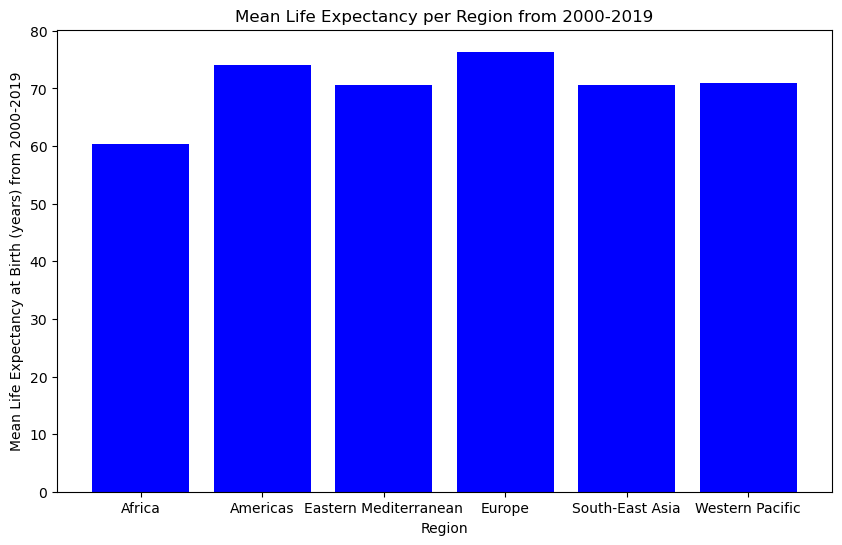

In [2052]:
# Create a bar chart with the mean life expectancies for each region
plt.figure(figsize=(10, 6))
plt.bar(df_mean_life['Region'], df_mean_life['Life expectancy at birth (years)'], color='blue')

# Add title and labels
plt.title('Mean Life Expectancy per Region from 2000-2019')
plt.xlabel('Region')
plt.ylabel('Mean Life Expectancy at Birth (years) from 2000-2019')

# Show the plot
plt.show()


From this bar chart, the region with the highest mean life expectancy from 2000 to 2019 is Europe, while the region with the lowest is Africa. 

Create boxplot to show the distribution of life expectancies for each region:

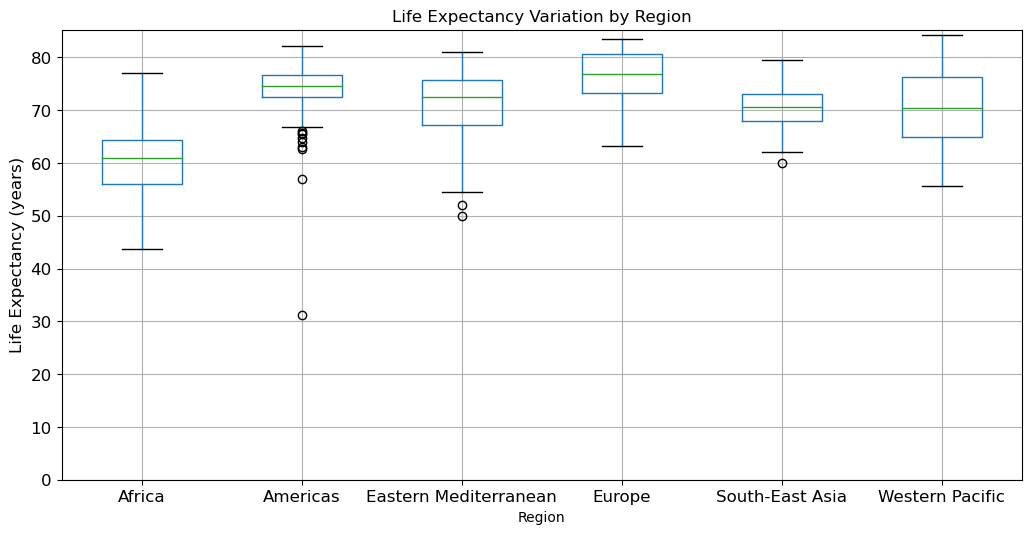

In [2053]:
# Set font size for the plot
fontsize = 12


# Create a box plot
ax = df_life.boxplot(column='Life expectancy at birth (years)', by='Region', figsize=(12, 6), fontsize=fontsize)

# Set the y-axis limit to 0 and a little above the max life expectancy
ax.set_ylim(0, df_life['Life expectancy at birth (years)'].max() + 1)

# Set y-axis label
ax.set_ylabel("Life Expectancy (years)", fontsize=fontsize)

# Set title
ax.set_title('Life Expectancy Variation by Region')
#Remove automatic 'Boxplot grouped by Region' title
plt.suptitle('')  # Suppress the default title

# Display the plot
plt.show()

The boxplot provides a visualisation of the variation of life expectancies per region. Europe and the Americas tend to have higher median life expectancies with less spread compared to Africa, which not only has a lower median life expectancy but also a wider spread, indicating a larger disparity within the region. 

The circles represent outliers, and it is noticable that Americas has a significant number of outliers, including one circle of just above 30. This outlier is very low and will be investigated. The high number of outliers in the Americas reflects the diversity of the region. The region encompasses a wide range of socioeconomic conditions, from high-income nations like the United States and Canada to middle and lower income countries in South America and the Caribbean. 

In [2054]:
#Create dataframe of life expectancies under 35 for the Americas region
df_35 = df_life[(df_life['Life expectancy at birth (years)'] < 35) & (df_life['Region'] == 'Americas')]

#View the dataframe
df_35

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,,,
HTI,Haiti,Americas,2010,3.1354,3.4,0.81,41.8,31.2792,865.4706,7.88464,9.6


As seen in the above dataframe, the very low outlier in the Americas is for Haiti in 2010. This is the year that Haiti suffered a catastrophic earthquake, resulting in a major decline in life expectancy for that year. 

The trend of life expectancies for each region is also plotted. 

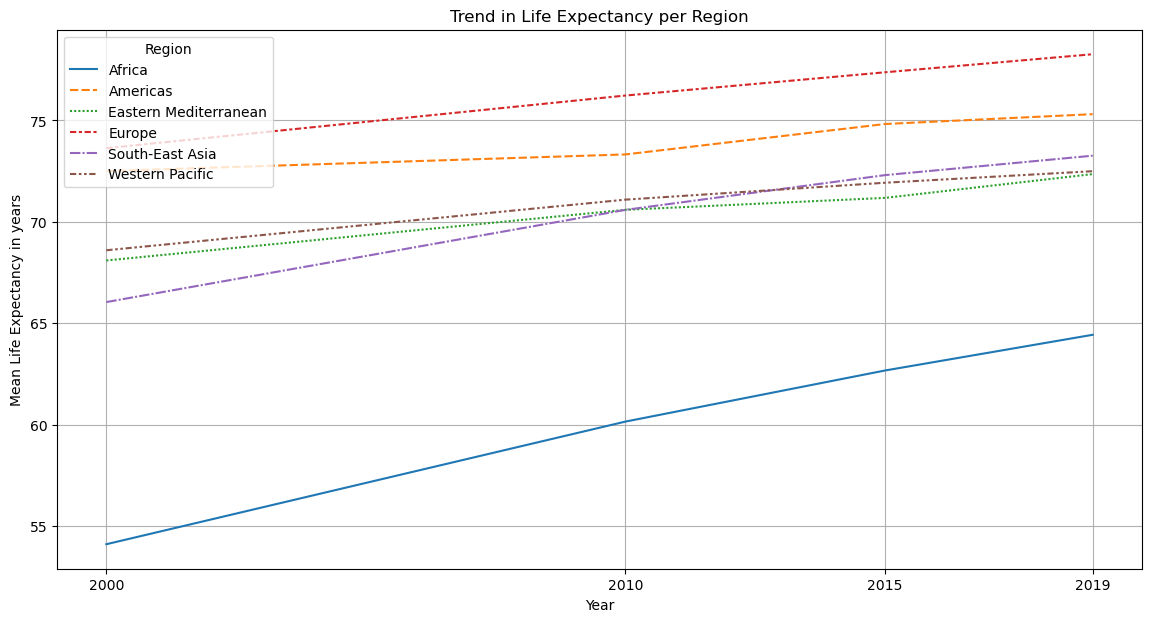

In [2055]:
# Group by Region then by Year
groupby_list = ['Region', 'Year']

#Plot the trend
plot_trend(groupby_list, df_life, 'Life expectancy at birth (years)', 'Trend in Life Expectancy per Region', 'Year', 'Mean Life Expectancy in years')

From the above graph, it is clear that all regions have experienced an increase in life expectancy from 2000 to 2019. Africa shows the lowest life expectancy but the most improvement, reflecting a high rate of overall healthcare development in the region. 

### Health Expenditure vs Life Expectancy

Health expenditure and life expectancy will be analysed to see if there is a relationship between these two indicators. One would expect to see a higher life expectancy in countries that prioritise health expenditure. 

First a dataframe is created where all of the 0 value cells in the life expectancy and health expenditure columns are removed. 

In [2056]:
# Remove rows where health expenditure or life expectancy is zero
df_health_life = df[
    (df['Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)'] > 0) &
    (df['Life expectancy at birth (years)'] > 0)
]

#View the dataframe
df_health_life

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized",Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%),"Prevalence of hypertension among adults aged 30-79 years, age-standardized",Life expectancy at birth (years),Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,,,
AFG,Afghanistan,Eastern Mediterranean,2010,0.01241,3.1,0.47,38.2,59.94055,950.6849,8.95014,30.2
AFG,Afghanistan,Eastern Mediterranean,2015,0.00874,3.1,0.52,39.2,61.65429,895.0696,12.56313,26.6
AFG,Afghanistan,Eastern Mediterranean,2019,0.01618,0.0,0.50,40.2,63.20990,881.2331,16.21054,0.0
AGO,Angola,Africa,2000,5.18632,2.8,1.11,37.9,49.30265,775.0211,5.30158,0.0
AGO,Angola,Africa,2010,8.31990,2.9,1.67,39.3,58.06943,682.3022,8.05471,0.0
...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Africa,2015,3.72765,2.7,2.09,34.6,60.49665,729.0304,7.88017,15.8
ZMB,Zambia,Africa,2019,3.85176,0.0,2.26,32.3,62.45290,679.4242,9.55727,0.0
ZWE,Zimbabwe,Africa,2010,3.31307,2.9,2.75,43.4,51.49335,861.7858,9.42298,15.7


A scatter plot is formed to investigate whether there is a corrleation between health expenditure and life expectancy. 

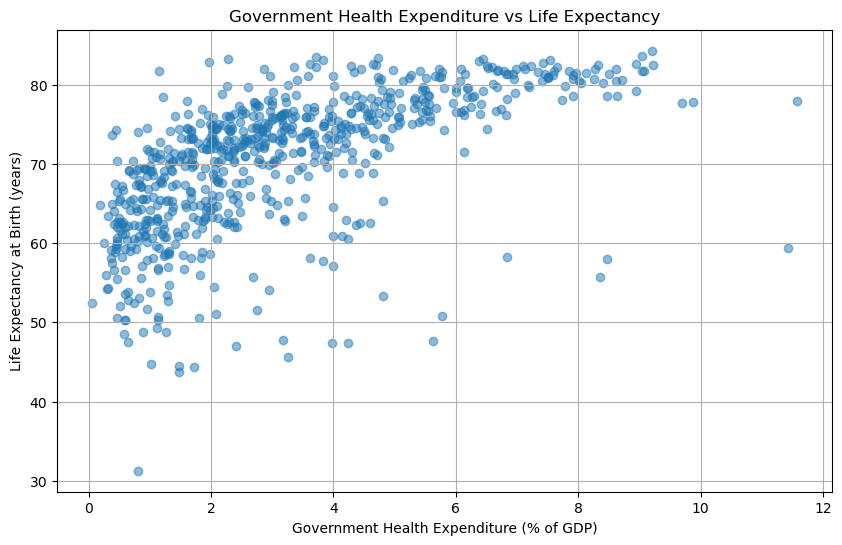

In [2057]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plotting
plt.scatter(
    df_health_life['Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)'],
    df_health_life['Life expectancy at birth (years)'],
    alpha=0.5  # Makes the dots semi-transparent
)

# Labeling
plt.title('Government Health Expenditure vs Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.grid(True)

# Show the plot
plt.show()


From the scatter plot, there seems to be a positive correlation between these two indicators. The strength of this correlation is calculated below. 

In [2058]:
#Make sure only numeric values are considered for the correlation calcualtion
df_numeric_health = df_health_life.select_dtypes(include=[np.number])

# Calculating the correlation matrix. This correlation matrix will be used later for heatmap analysis. 
correlation_matrix_health_life = df_numeric_health.corr()

# Extracting the correlation between health expenditure and life expectancy
health_life_corr = correlation_matrix_health_life.loc['Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)', 'Life expectancy at birth (years)']

print(f"Correlation between government health expenditure and life expectancy: {health_life_corr}")

Correlation between government health expenditure and life expectancy: 0.6073128752051304


There is a moderate to strong positive relationship between government health expenditure and life expectancy. Generally, as government health expenditure increases, life expectancy also increases. This is not a perfect correlation and this correlation does not mean causation, from the scatter plot it can be seen that some countries have high life expectancy with low government health expenditure, and some have low life expectancies with high government health expenditure. 

 ### Non-Communicable Disease (NCD) Risk Factors

Non-communicable diseases, also known as chronic diseases, tend to be of long  duration and are the result of a combination of genetic, physiological, environmental and behavioural factors. They are the leading cause of death globally. The main types of NCD are cardiovascular diseases (such as heart attacks and stroke), cancers, chronic respiratory diseases (such as chronic obstructive pulmonary disease and asthma) and diabetes.

The World Health Organization (WHO) outlines a number of risk factors associated with NCDs including raised cholesterol, high blood pressure, harmful alcohol consumption, obesity and tobacco use.

A dataframe is created with positive values for all of the indicators to get rid of any 0 value cells. 

Only the risk factors for NCDs will be considered in this analysis, so the data for life expectancy and health expenditure will be dropped. 

In [2059]:
df_NCD = df.drop(['Life expectancy at birth (years)', 'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)'], axis=1)
df_NCD

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized","Prevalence of hypertension among adults aged 30-79 years, age-standardized",Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,
AFG,Afghanistan,Eastern Mediterranean,2000,0.00277,3.1,36.4,1041.634,4.25171,39.2
AFG,Afghanistan,Eastern Mediterranean,2001,0.00000,3.1,36.5,1050.808,4.59872,0.0
AFG,Afghanistan,Eastern Mediterranean,2002,0.00000,3.1,36.7,1051.905,4.97112,0.0
AFG,Afghanistan,Eastern Mediterranean,2003,0.00000,3.1,36.9,1042.000,5.36920,0.0
AFG,Afghanistan,Eastern Mediterranean,2004,0.00000,3.1,37.1,1038.197,5.79330,0.0
...,...,...,...,...,...,...,...,...,...
ZWE,Zimbabwe,Africa,2018,0.00000,2.8,42.4,738.462,12.33166,0.0
ZWE,Zimbabwe,Africa,2019,3.62809,0.0,42.3,734.978,12.76917,0.0
ZWE,Zimbabwe,Africa,2020,0.00000,0.0,0.0,0.000,13.22733,11.9


In [2060]:
#Creating dataframe without 0 or NaN values for any of the columns of interest
df_NCD = df_NCD[
    (df_NCD['Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)'] > 0) &
    (df_NCD['Mean Non-HDL cholesterol, age-standardized'] > 0) &
    (df_NCD['Prevalence of hypertension among adults aged 30-79 years, age-standardized'] > 0) &
    (df_NCD['Age-standardized NCD mortality rate  (per 100 000 population)'] > 0) &
    (df_NCD['Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'] > 0) &
    (df_NCD['Estimate of current tobacco use prevalence (%) (age-standardized rate)'] > 0)
]
df_NCD

,Country,Region,Year,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)","Mean Non-HDL cholesterol, age-standardized","Prevalence of hypertension among adults aged 30-79 years, age-standardized",Age-standardized NCD mortality rate (per 100 000 population),"Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Estimate of current tobacco use prevalence (%) (age-standardized rate)
Country Code,,,,,,,,,
AFG,Afghanistan,Eastern Mediterranean,2000,0.00277,3.1,36.4,1041.6340,4.25171,39.2
AFG,Afghanistan,Eastern Mediterranean,2005,0.02684,3.1,37.2,1027.3780,6.24419,34.2
AFG,Afghanistan,Eastern Mediterranean,2010,0.01241,3.1,38.2,950.6849,8.95014,30.2
AFG,Afghanistan,Eastern Mediterranean,2015,0.00874,3.1,39.2,895.0696,12.56313,26.6
ALB,Albania,Europe,2000,4.43100,3.7,40.9,655.9436,12.76226,35.4
...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Africa,2015,3.72765,2.7,34.6,729.0304,7.88017,15.8
ZWE,Zimbabwe,Africa,2000,3.02610,2.8,40.4,608.2065,6.84812,21.4
ZWE,Zimbabwe,Africa,2005,2.74545,2.9,42.4,685.7761,8.00264,18.3


The below function creates a heatmap to analyse the correlation between indicators. In particular, the heatmap will be used to analyse any correlations between the NCD mortality rate and the NCD risk factors.  The correlation coefficients range from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation.

Since the indicator names are quite long, abbreviation are provided that are used in the heatmap. The create_heatmap function has the title of the heatmap and the dataframe as arguments. It then plots the data from the dataframe into a heatmap. 

In [2061]:
abbreviations = {
    'Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)': 'Alcohol Consumption',
    'Mean Non-HDL cholesterol, age-standardized': 'Mean Non-HDL Chol',
    'Prevalence of hypertension among adults aged 30-79 years, age-standardized': 'Hypertension Prevalence',
    'Age-standardized NCD mortality rate  (per 100 000 population)': 'NCD Mortality Rate',
    'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)': 'Obesity Prevalence',
    'Estimate of current tobacco use prevalence (%) (age-standardized rate)': 'Tobacco Use Prevalence'
}

#Create function that produces a heat map from the dataframe
def create_heatmap(dataframe, title='Heatmap'):
    # Abbreviate column names using the mapping dictionary
    dataframe = dataframe.rename(columns=abbreviations)
    # Make sure to only include numerical values in the correlation. Drop the year column as do not want this in the correlation matrix
    df_numeric = dataframe.drop(columns='Year').select_dtypes(include=[np.number])
    # Create the correlation matrix
    corr_matrix = df_numeric.corr()
    # Set up the matplotlib figure size
    plt.figure(figsize=(14, 10)) 
    # Create the heatmap with annotations and a specified aspect ratio
    heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    #Add a title to the heatmap
    plt.title(title)
    return heatmap
    


First a heatmap is created showing the correlations between all the indicators when considering all countries:

<Axes: title={'center': 'Global Correlations'}>

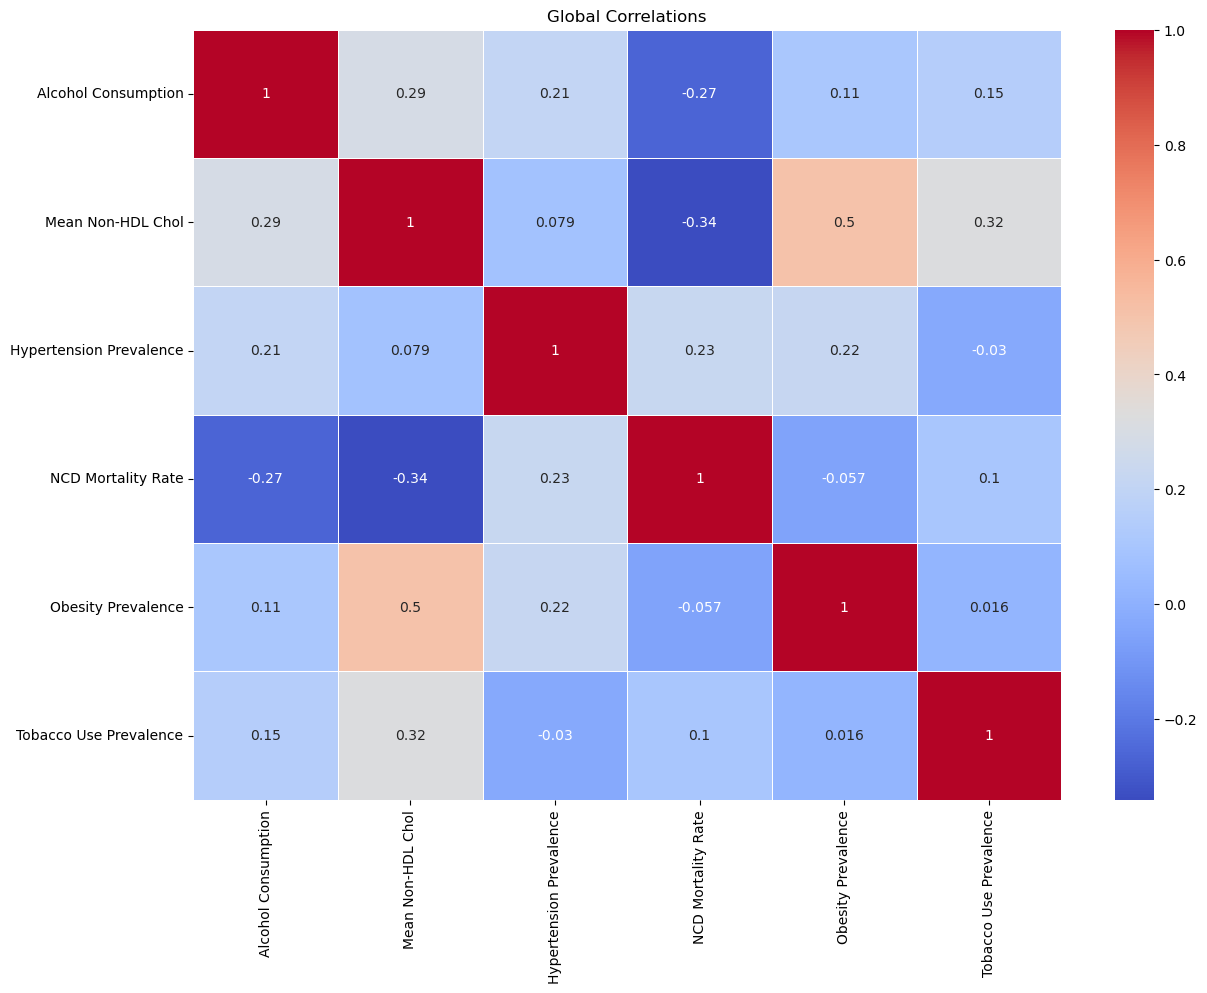

In [2062]:
create_heatmap(df_NCD, 'Global Correlations')

In this heatmap showing the correlations of the selected indicators for all countries, the strongest positive NCD risk factor is hypertension. However, this is a weak correlation of 0.23. Globally, the other correlation of note is between obesity and non-HDL cholesterol. HDL is considered "good" cholesterol and non-HDL is considered "bad" cholesterol. This positive correlation of 0.5 shows a moderate relationship between obesity and levels of non-HDL cholesterol. 

The heatmap for Europe is shown below:

<Axes: title={'center': 'Europe Correlations'}>

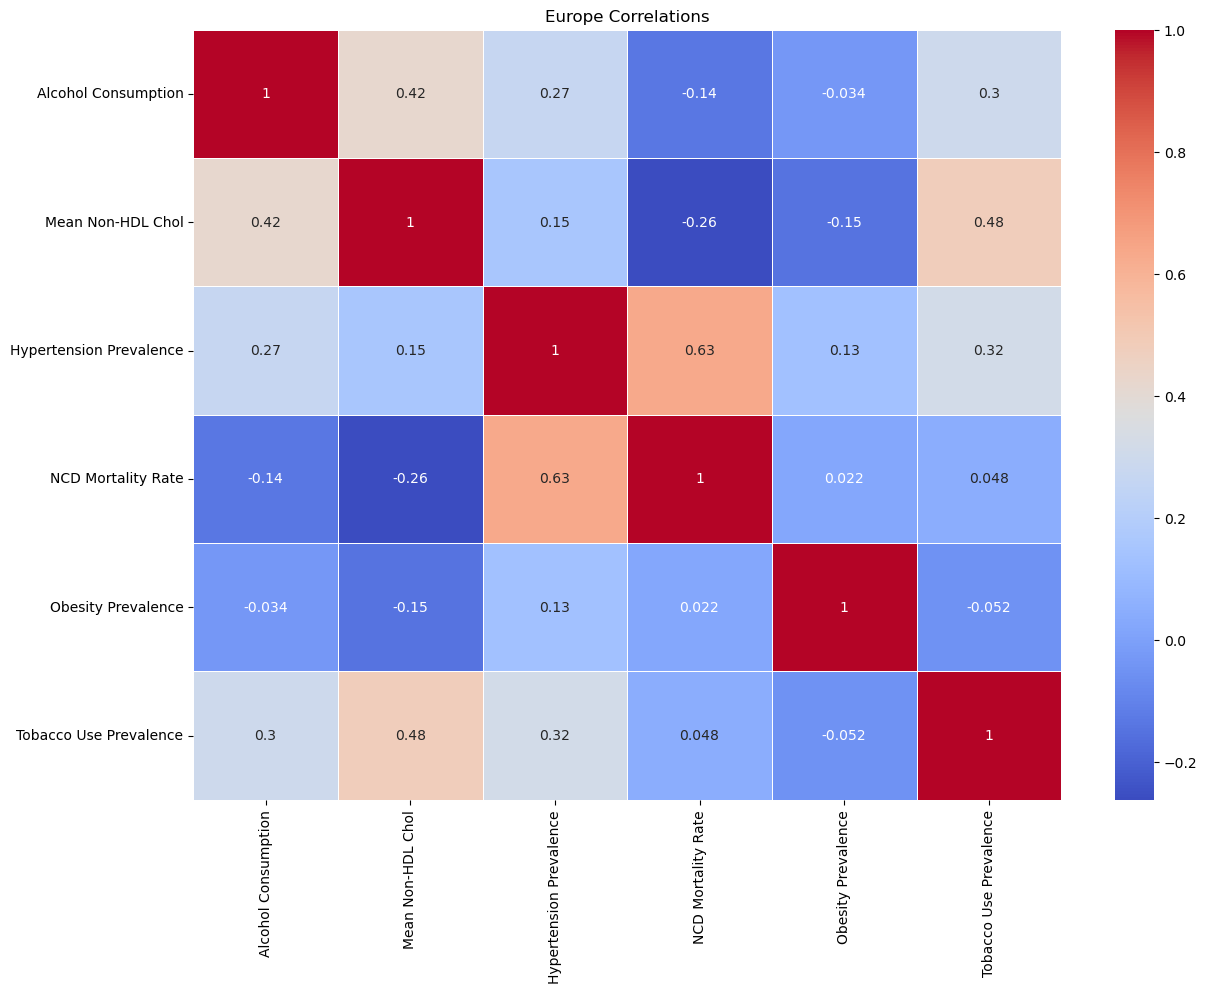

In [2063]:
df_NCD_Europe = df_NCD[df_NCD['Region'] == 'Europe']
create_heatmap(df_NCD_Europe, 'Europe Correlations')

In Europe, the main risk factor for NCDs is hypertension, showing a moderately strong positive correlation of 0.63. This correlation of hypertension with NCD mortality rate is stronger than for the global heatmap. 

The trend in hypertension and NCD mortality rate for Europe will be investigated. The data for both these indicators will be normalised using max-min normalisation in order for both to be plotted on the same graph. The below function normalises the data and adds the normalised data to the dataframe. 

In [2064]:
#Create function to max min normalise data
def normalise_data(dataframe, column_name, normalised_column_name):
    minimum_value = dataframe[column_name].min()
    maximum_value = dataframe[column_name].max()
    dataframe[normalised_column_name] = (dataframe[column_name] - minimum_value)/(maximum_value-minimum_value)

The normalise_data function is called for both indicators. 

In [2065]:
normalise_data(df_NCD_Europe, 'Age-standardized NCD mortality rate  (per 100 000 population)', 'NCD mortality rate Norm')
normalise_data(df_NCD_Europe, 'Prevalence of hypertension among adults aged 30-79 years, age-standardized', 'Hypertension Norm')

C:\Users\seanc\AppData\Local\Temp\ipykernel_11800\2828892293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[normalised_column_name] = (dataframe[column_name] - minimum_value)/(maximum_value-minimum_value)
C:\Users\seanc\AppData\Local\Temp\ipykernel_11800\2828892293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[normalised_column_name] = (dataframe[column_name] - minimum_value)/(maximum_value-minimum_value)


The mean value for both the normalised datasets is calculated. Then the mean values for both normalised indicators are plotted. 

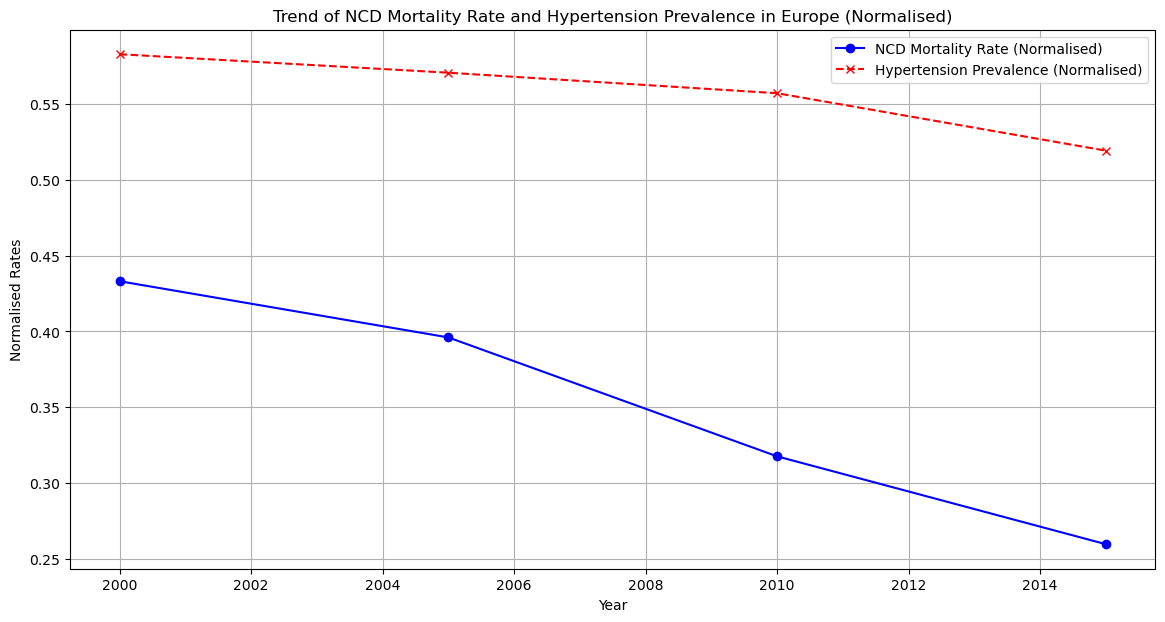

In [2066]:
# Group the data by Year and calculate the mean for the normalised NCD mortality rate and Hypertension prevalence
ncd_mortality_trend = df_NCD_Europe.groupby('Year')['NCD mortality rate Norm'].mean()
hypertension_trend = df_NCD_Europe.groupby('Year')['Hypertension Norm'].mean()

# Create a new figure for plotting
plt.figure(figsize=(14, 7))

# Plot the normalised NCD mortality rate trend
plt.plot(ncd_mortality_trend.index, ncd_mortality_trend.values, marker='o', linestyle='-', color='blue', label='NCD Mortality Rate (Normalised)')

# Plot the Hypertension prevalence trend on the same figure but with a different y-axis
plt.plot(hypertension_trend.index, hypertension_trend.values, marker='x', linestyle='--', color='red', label='Hypertension Prevalence (Normalised)')

# Create labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Normalised Rates')
plt.title('Trend of NCD Mortality Rate and Hypertension Prevalence in Europe (Normalised)')
plt.legend()

# Show the plot with a grid for easier reading
plt.grid(True)
plt.show()


The above graph showing the trends in normalised NCD mortality rate and hypertension prevalence for Europe shows that as the the NCD mortality rate decreases as the hypertension prevalence decreases. Given the correlation of 0.63 between these two indicators, hypertension is a significant risk factor for NCDs in Europe. However, it's important to remember that correlation does not mean causation. While these two indicators are related, this correlation alone does not prove that the decrease in hypertension causes the decrease in NCD mortality rates. Other factors could also be influencing both hypertension prevalence and NCD mortality rates, or there could be a complex interplay of multiple risk factors contributing to the overall health outcomes observed.

# Discussion and Conclusions
This assignment collects, prepares and analyses data from the World Health Organisation Global Health Observatory API. It focuses on a number of health-related indicators and the relationships between them. The period of analysis ranges from 2000 to 2023. 

## Challenges
One key challenge in this assignment was dealing with the missing data. For some indicators there was limited data available. For example, life expectancy at birth data was only available for the years 2000, 2010, 2015 and 2019. If all of the rows with missing data were removed during the data processing stage, the dataframe would have been decimated, as removing the rows with missing data for the life expectancy would have removed valid data for other indicators. So the missing values were dealt with on a case-by-case basis during the data analysis. 

Another challenge I encountered was retrieving the indicator name and country name from the indicator data. Neither the indicator name or country name was given in the indicator data, only the indicator code and country code. I had to use these codes to retrieve the names using the get_indicator_name and get_country_name functions and then add these names to the dataframe.

Preparing the data after it had been parsed and merged presented another challenge. Originally, after parsing and merging, the dataframe consisted of 33,075 rows. The challenge was to group each year within a country together so that, for example, Ireland in 2019 had only one row of data. After the data was grouped in this way, the number of rows reduced to 4,621.

## Key Insights
In Europe, the non-communicable disease (NCD) risk factor with the highest correlation to NCD mortality rate was hypertension prevalence. Globally, the alcohol consumption and non-HDL cholesterol show a weak negative correlation with NCD mortality rate. This negative correlation suggests that countries with higher levels of alcohol consumption and non-HDL cholesterol are associated with lower NCD mortality rates. This is counterintuitive as higher alcohol consumption and non-HDL cholesterol levels are outlined by the WHO as risk factors for developing a NCD. There are a number of reasons for this negative correlation, for example countries with higher incomes may have populations that consume more alcohol and have diets that lead to higher cholesterol, but also have the resources to treat related health conditions effectively, thus reducing NCD mortality. The risk factors for NCDs are complex and NCDs are typically not caused by a single factor but by a combination of genetic, physiological, environmental and behavioural factors.

From the analysis of health expenditure and life expectancy, in general a higher health expenditure suggests a higher life expectancy, but this is not always the case as the correlation is 0.6 and there are outliers where government heath expenditure as a percentage of GDP is relatively high but life expectancy is relatively low.  This low life expectancy with high government health expenditure may be due to systematic healthcare inefficiencies or prevalence of certain diseases. It is interesting to note the spike in global health expenditure in 2020, most likely due to the COVID-19 pandemic.

## Areas for Further Analysis
This analysis could be expanded on in a number of ways:
* Include more risk factors for NCDs, such as blood sugar levels and air pollution, to investigate their effect on NCD mortality rate.
* A predictive model could be developed to predict a countries future NCD mortality rate based on a larger collection of risk factors. 
* A wide range of other health-related indicators could be analysed, such as for example infant vaccination rates vs infant mortality rate. 
* In future years when the data becomes available, an analysis of how COVID-19 influenced health expenditures, life expectancy and NCD prevalence would be interesting. 
* Incorporating socioeconomic factors such as a countries GDP per capita would help to develop a better understanding of the broader social factors contributing to a countries life expectancy and NCD mortality rate.